Kaggle Dataset - https://www.kaggle.com/datasets/shrutimehta/zomato-restaurants-data

Required files
- zomato.csv
- Country-Code.xlsx

Zomato is a restaurant search and discovery service founded in 2008 by Indian entrepreneurs Deepinder Goyal and Pankaj Chaddah. Zomato provides information, menus, and user reviews of restaurants as well as food delivery options from partner restaurants in select cities. It currently operates in 23 countries. The dataset has all restaurants & eateries currently under its purview.

### Importing the Libraries

In [394]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [395]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [396]:
# read the dataframe

df = pd.read_csv("zomato.csv", encoding="latin-1")
# df = pd.read_csv("zomato.csv", encoding="ANSI")

In [397]:
df_country = pd.read_excel("Country-Code.xlsx")

### Inspecting the dataframe

In [398]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [399]:
df.shape

(9551, 21)

In [400]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

**Data dictionary**

- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant
- Country Code: Country in which restaurant is located
- City: City in which restaurant is located
- Address: Address of the restaurant
- Locality: Location in the city
- Locality Verbose: Detailed description of the locality
- Longitude: Longitude coordinate of the restaurant's location
- Latitude: Latitude coordinate of the restaurant's location
- Cuisines: Cuisines offered by the restaurant
- Average Cost for two: Cost for two people in different currencies 
- Currency: Currency of the country
- Has Table booking: yes/no
- Has Online delivery: yes/ no
- Is delivering: yes/ no
- Switch to order menu: yes/no
- Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings casted by people

In [401]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [402]:
df_country.head()

,Country Code,Country,Currency Code,Conversion Rate
0,1,India,INR,0.012878
1,14,Australia,AUD,0.700340
2,30,Brazil,BRL,0.201536
3,37,Canada,CAD,0.779126
4,94,Indonesia,IDR,0.000068


In [403]:
df_country.shape

(15, 4)

### Data analysis

- Missing values
- Numerical variable exploration
- Categorical variable exploration
- Finding relationship between features

### Missing values

In [404]:
# Null values

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [405]:
# List comprehension

[feature for feature in df.columns if df[feature].isnull().sum()>0]

['Cuisines']

<AxesSubplot:>

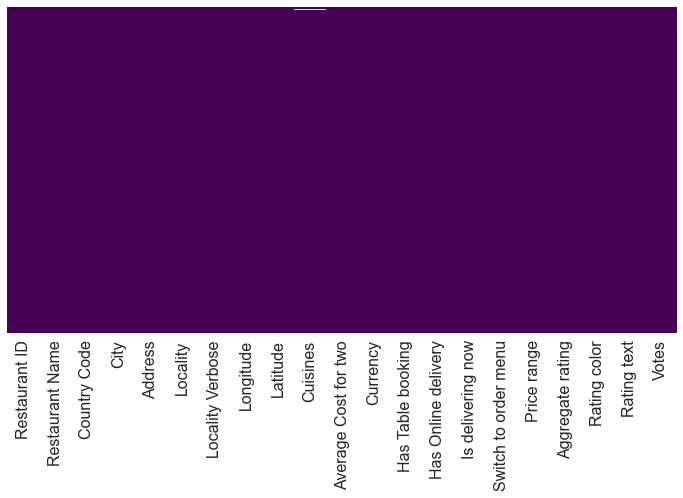

In [406]:
# Heat map

sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [407]:
df_country.isnull().sum()

Country Code       0
Country            0
Currency Code      0
Conversion Rate    0
dtype: int64

- There are 9 missing values in Cuisines column

### Data merging

In [408]:
# Merging the dataframes

final_df = df.merge(df_country, on="Country Code", how="left")

In [409]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Currency Code,Conversion Rate
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,PHP,0.019102
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,PHP,0.019102
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,4,4.4,Green,Very Good,270,Phillipines,PHP,0.019102
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,PHP,0.019102
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,PHP,0.019102


In [410]:
final_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
Currency Code           0
Conversion Rate         0
dtype: int64

In [411]:
# Check data types

final_df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
Currency Code            object
Conversion Rate         float64
dtype: object

In [412]:
final_df[final_df.Cuisines.isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Currency Code,Conversion Rate
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.154000,31.577200,NaN,...,No,No,1,3.4,Orange,Average,34,United States,USD,1.0
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.175900,31.588200,NaN,...,No,No,1,3.4,Orange,Average,36,United States,USD,1.0
94,17284158,Jimmie's Hot Dogs,216,Albany,"204 S Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.153400,31.575100,NaN,...,No,No,1,3.9,Yellow,Good,160,United States,USD,1.0
297,17374552,Corkscrew Cafe,216,Gainesville,"51 W Main St, Dahlonega, GA 30533",Dahlonega,"Dahlonega, Gainesville",-83.985800,34.531800,NaN,...,No,No,3,3.9,Yellow,Good,209,United States,USD,1.0
328,17501439,Dovetail,216,Macon,"543 Cherry St, Macon, GA 31201",Macon,"Macon, Macon",-83.627979,32.836410,NaN,...,No,No,3,3.8,Yellow,Good,102,United States,USD,1.0
346,17606621,HI Lite Bar & Lounge,216,Miller,"109 N Broadway Ave, Miller, SD 57362",Miller,"Miller, Miller",-98.989100,44.515800,NaN,...,No,No,1,3.4,Orange,Average,11,United States,USD,1.0
368,17059060,Hillstone,216,Orlando,"215 South Orlando Avenue, Winter Park, FL 32789",Winter Park,"Winter Park, Orlando",-81.365260,28.596682,NaN,...,No,No,3,4.4,Green,Very Good,1158,United States,USD,1.0
418,17142698,Leonard's Bakery,216,Rest of Hawaii,"933 Kapahulu Ave, Honolulu, HI 96816",Kaimuki,"Kaimuki, Rest of Hawaii",-157.813432,21.284586,NaN,...,No,No,1,4.7,Dark Green,Excellent,707,United States,USD,1.0
455,17616465,Tybee Island Social Club,216,Savannah,"1311 Butler Ave, Tybee Island, GA 31328",Tybee Island,"Tybee Island, Savannah",-80.848297,31.995810,NaN,...,No,No,1,3.9,Yellow,Good,309,United States,USD,1.0


There are multiple ways to deal with missing values. A few of the methods that we can use to populate the missing values are as follows:

- Fill up the missing values with the most commonly occuring value in the column (mode)
- Fill in values based on what would make more sense per the domain of the data in consideration (Verify with Subject Matter Expert)
- Remove the rows if the percentage of missing values is negligible to your analysis

In [413]:
final_df[final_df.Country == "United States"]["Cuisines"].value_counts()

Mexican                          25
American                         16
BBQ                               9
Chinese                           9
Seafood                           8
                                 ..
Desserts, Pizza, Ice Cream        1
International, Pizza              1
Breakfast, Pizza                  1
American, Burger, Pizza, Cafe     1
Burger, Greek, Sandwich           1
Name: Cuisines, Length: 229, dtype: int64

In [414]:
final_df[final_df.Country == "United States"]["Cuisines"].mode()[0]

'Mexican'

In [415]:
final_df.Cuisines.fillna("Mexican", inplace=True)

In [416]:
final_df[final_df.Cuisines.isnull()]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country,Currency Code,Conversion Rate


In [417]:
final_df[final_df.Country == "United States"]["Cuisines"].value_counts()

Mexican                          34
American                         16
BBQ                               9
Chinese                           9
Seafood                           8
                                 ..
Desserts, Pizza, Ice Cream        1
International, Pizza              1
Breakfast, Pizza                  1
American, Burger, Pizza, Cafe     1
Burger, Greek, Sandwich           1
Name: Cuisines, Length: 229, dtype: int64

In [418]:
# check duplicates

final_df["Restaurant ID"].duplicated().sum()

0

In [419]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country', 'Currency Code', 'Conversion Rate'],
      dtype='object')

### Univariate and bivariate analysis

In [420]:
final_df['Switch to order menu'].value_counts()

No    9551
Name: Switch to order menu, dtype: int64

In [421]:
# dropping Switch to order menu as it has only No values

final_df.drop('Switch to order menu', axis=1, inplace=True)

In [422]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country',
       'Currency Code', 'Conversion Rate'],
      dtype='object')

In [423]:
# Zomato's presence around the world
# Country distribution

100 * final_df.Country.value_counts(normalize=True)

India             90.587373
United States      4.544027
United Kingdom     0.837609
Brazil             0.628206
UAE                0.628206
South Africa       0.628206
New Zealand        0.418804
Turkey             0.355984
Australia          0.251283
Phillipines        0.230342
Indonesia          0.219872
Singapore          0.209402
Qatar              0.209402
Sri Lanka          0.209402
Canada             0.041880
Name: Country, dtype: float64

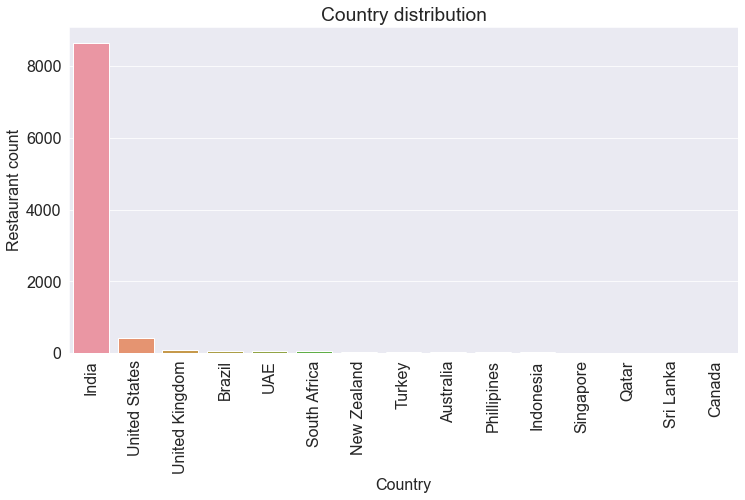

In [424]:
sns.countplot(data=final_df, x=final_df.Country, order=final_df.Country.value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Restaurant count')
plt.title('Country distribution')
plt.show()

In [425]:
len(final_df.Country.value_counts())

15

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Zomato service is available in 15 countries
- Top 3 countries with major presence are India, United States and United Kingdom
- Zomato has more than 90% of the total restaurants in India. It makes sense as it's an Indian startup and hence has maximum business in Indian cities


</div>

In [426]:
# city distribution

100* final_df.City.value_counts(normalize=True).head(10)

New Delhi       57.302900
Gurgaon         11.705581
Noida           11.307716
Faridabad        2.627997
Ghaziabad        0.261753
Bhubaneshwar     0.219872
Amritsar         0.219872
Ahmedabad        0.219872
Lucknow          0.219872
Guwahati         0.219872
Name: City, dtype: float64

In [427]:
100* final_df.City.value_counts().tail(10)

Ojo Caliente        100
Montville           100
Monroe              100
Miller              100
Middleton Beach     100
Panchkula           100
Mc Millan           100
Mayfield            100
Macedon             100
Vineland Station    100
Name: City, dtype: int64

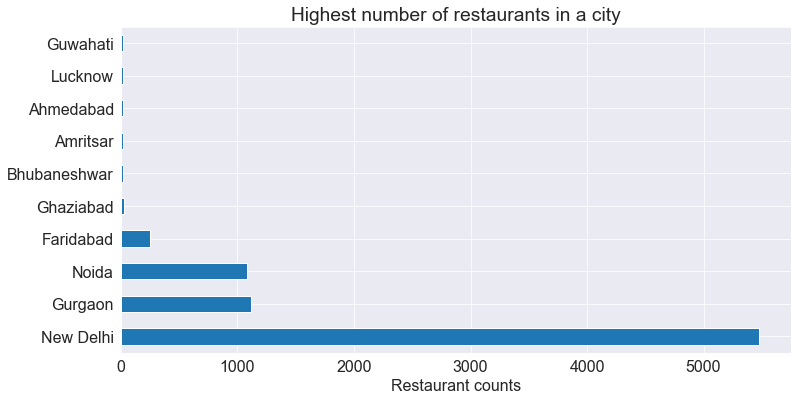

In [428]:
final_df.City.value_counts().nlargest(10).plot(kind='barh')
plt.title("Highest number of restaurants in a city")
plt.xlabel("Restaurant counts")
plt.show()

In [429]:
# city distribution per country

final_df.groupby(['Country'])['City'].nunique().sort_values(ascending=False)

Country
India             43
United States     35
Australia         23
Phillipines        9
South Africa       6
Canada             4
Indonesia          4
United Kingdom     4
Brazil             3
UAE                3
New Zealand        2
Turkey             2
Qatar              1
Singapore          1
Sri Lanka          1
Name: City, dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- 57% of the restaurants are from Delhi in India
- Highest number of restaurants are from the North Indian cities
- Zomato is available in 43 cities in India, 35 cities in United States and 23 cities in Australia
- Top 3 countries with majorority of restaurants are India, United States and United Kingdom. Zomato services are avalable in only 4 cities in United Kingdom

</div>

In [430]:
# Locality distribution

100* final_df.Locality.value_counts(normalize=True).head(10)

Connaught Place        1.277353
Rajouri Garden         1.036541
Shahdara               0.910899
Defence Colony         0.900429
Malviya Nagar          0.889959
Pitampura              0.889959
Mayur Vihar Phase 1    0.879489
Rajinder Nagar         0.848079
Safdarjung             0.837609
Satyaniketan           0.827139
Name: Locality, dtype: float64

In [431]:
final_df[["City", "Locality"]].groupby(["City", "Locality"]).size().reset_index().rename(columns={0:"Restaurant counts"}).sort_values(by="Restaurant counts").tail(10)

,City,Locality,Restaurant counts
870,New Delhi,Satyaniketan,79
864,New Delhi,Safdarjung,80
859,New Delhi,Rajinder Nagar,81
807,New Delhi,Malviya Nagar,84
812,New Delhi,Mayur Vihar Phase 1,84
846,New Delhi,Pitampura,85
725,New Delhi,Defence Colony,86
873,New Delhi,Shahdara,87
860,New Delhi,Rajouri Garden,99
712,New Delhi,Connaught Place,122


<div class="alert alert-block alert-success">
<b>Observation:</b> 

- New Delhi in India has the highest number of restaurants 
- Highest number of resturants are observed in Connaught Place

</div>

In [432]:
# Cuisine distribution

100* final_df.Cuisines.value_counts(normalize=True).head(10)

North Indian                      9.800021
North Indian, Chinese             5.350225
Chinese                           3.706418
Fast Food                         3.706418
North Indian, Mughlai             3.497016
Cafe                              3.130562
Bakery                            2.282484
North Indian, Mughlai, Chinese    2.062611
Bakery, Desserts                  1.779918
Street Food                       1.560046
Name: Cuisines, dtype: float64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- North Indian, Chinese and Fast Food are the most popular cuisines. New restaurants opening up with these cuisines can face stiff competition from established restaurants.

</div>

In [433]:
# Average Cost for two distribution

100* final_df["Average Cost for two"].value_counts(normalize=True)

500       9.423097
300       9.391687
400       8.972882
200       7.192964
600       6.826510
            ...   
8000      0.010470
2350      0.010470
150000    0.010470
70000     0.010470
545       0.010470
Name: Average Cost for two, Length: 140, dtype: float64

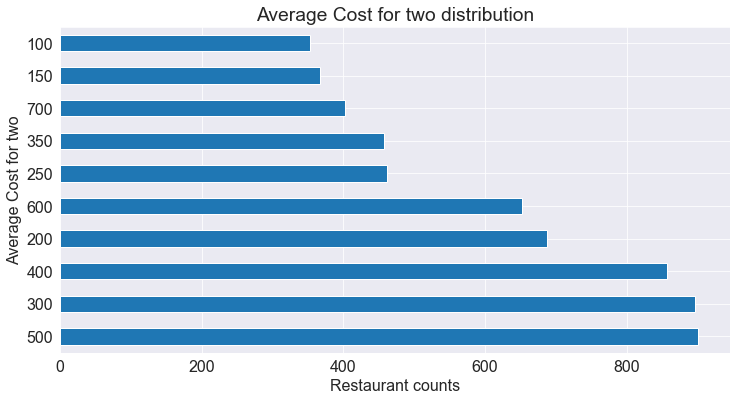

In [434]:
final_df["Average Cost for two"].value_counts().nlargest(10).plot(kind='barh')
plt.title("Average Cost for two distribution")
plt.xlabel("Restaurant counts")
plt.ylabel("Average Cost for two")
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Popular price range for Average Cost for two are 300 - 500 

</div>

In [435]:
# converting all prices to USD dollars

final_df["Average Cost for two(USD)"] = round(final_df["Average Cost for two"]*final_df["Conversion Rate"],2)

In [436]:
# top 10 expensive restaurants

final_df[["Restaurant Name","Country", "City", "Average Cost for two(USD)"]].sort_values(by="Average Cost for two(USD)", ascending=False).head(10)

,Restaurant Name,Country,City,Average Cost for two(USD)
458,Restaurant Andre,Singapore,Singapore,360.26
460,Jaan,Singapore,Singapore,309.82
9384,Restaurant Gordon Ramsay,United Kingdom,London,285.25
461,Rhubarb Le Restaurant,Singapore,Singapore,226.96
469,Summer Pavilion,Singapore,Singapore,216.15
456,Sky On 57,Singapore,Singapore,216.15
9484,Restaurant Mosaic @ The Orient,South Africa,Pretoria,201.08
9416,The French by Simon Rogan - The Midland,United Kingdom,Manchester,198.44
457,Cut By Wolfgang Puck,Singapore,Singapore,194.54
468,Colony,Singapore,Singapore,158.51


<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Singapore has the most expensive restaurants

</div>

In [437]:
final_df.groupby('Country')['Average Cost for two(USD)'].mean().sort_values(ascending =False)

Country
Singapore         112.220000
Qatar              61.238000
United Kingdom     59.298375
UAE                45.305667
New Zealand        44.222500
Phillipines        30.691818
Canada             28.245000
Brazil             27.139167
South Africa       26.292167
United States      26.152074
Indonesia          19.083810
Australia          16.867917
India               8.028183
Sri Lanka           6.595500
Turkey              5.319706
Name: Average Cost for two(USD), dtype: float64

<AxesSubplot:ylabel='Country'>

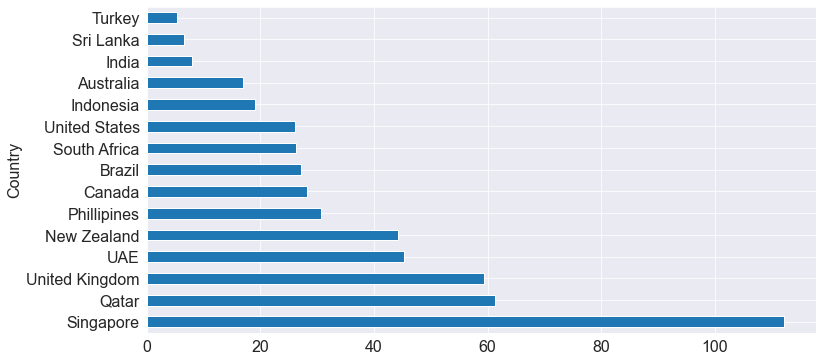

In [438]:
final_df.groupby('Country')['Average Cost for two(USD)'].mean().sort_values(ascending =False).plot.barh()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Singapore has the most expensive restaurants.
- Turkey, India and Sri Lanka have the cheapest restaurants

</div>

In [439]:
# top 10 expensive restaurants in India

temp_df = final_df[final_df.Country == "India"]
temp_df[["Restaurant Name","Country", "City", "Average Cost for two(USD)"]].sort_values(by="Average Cost for two(USD)", ascending=False).head(10)

,Restaurant Name,Country,City,Average Cost for two(USD)
7543,Orient Express - Taj Palace Hotel,India,New Delhi,103.03
4088,Tian - Asian Cuisine Studio - ITC Maurya,India,New Delhi,90.15
4087,Bukhara - ITC Maurya,India,New Delhi,83.71
7499,The Spice Route - The Imperial,India,New Delhi,77.27
7492,Nostalgia at 1911 Brasserie - The Imperial,India,New Delhi,77.27
7494,1911 - The Imperial,India,New Delhi,77.27
7538,Wasabi by Morimoto - The Taj Mahal Hotel,India,New Delhi,77.27
7522,MEGU - The Leela Palace,India,New Delhi,70.83
7539,House of Ming - The Taj Mahal Hotel,India,New Delhi,70.83
7512,24/7 Restaurant - The Lalit New Delhi,India,New Delhi,65.68


<div class="alert alert-block alert-success">
<b>Observation:</b> 

- New Delhi has the most expensive restaurants in India

</div>

In [440]:
temp_df.groupby("City")["Average Cost for two(USD)"].mean().sort_values(ascending=False).head()

City
Panchkula    25.760000
Hyderabad    17.529444
Pune         17.225000
Jaipur       16.871000
Kolkata      16.388000
Name: Average Cost for two(USD), dtype: float64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Panchkula, Hyderabad and Pune cities have the highest average cost for two in India

</div>

In [441]:
temp_df.groupby("City")["Average Cost for two(USD)"].mean().sort_values(ascending=False).tail()

City
Noida        6.947954
Allahabad    6.665000
Varanasi     6.504000
Amritsar     6.193333
Faridabad    5.764462
Name: Average Cost for two(USD), dtype: float64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Varanasi, Amritsar and Faridabad cities have the lowest average cost for two in India

</div>

In [442]:
# currency used in each country 

final_df[['Country', 'Currency']].groupby(['Country', 'Currency']).size().reset_index(name='count').drop('count', axis=1, inplace=False)

,Country,Currency
0,Australia,Dollar($)
1,Brazil,Brazilian Real(R$)
2,Canada,Dollar($)
3,India,Indian Rupees(Rs.)
4,Indonesia,Indonesian Rupiah(IDR)
5,New Zealand,NewZealand($)
6,Phillipines,Botswana Pula(P)
7,Qatar,Qatari Rial(QR)
8,Singapore,Dollar($)
9,South Africa,Rand(R)


<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Currency of Phillipines is incorrect

</div>

In [443]:
# replacing the correct currency for Phillipines

final_df.loc[final_df.Country=="Phillipines", "Currency"] = "Philippine Peso(PHP)"

In [444]:
# currency used in each country and the number of restaurants in each country

final_df[["Country","Currency"]].groupby(["Country","Currency"]).size().reset_index().rename(columns={0:"Restaurant count"}).sort_values(by="Restaurant count", ascending=False)

,Country,Currency,Restaurant count
3,India,Indian Rupees(Rs.),8652
14,United States,Dollar($),434
13,United Kingdom,Pounds(£),80
1,Brazil,Brazilian Real(R$),60
9,South Africa,Rand(R),60
12,UAE,Emirati Diram(AED),60
5,New Zealand,NewZealand($),40
11,Turkey,Turkish Lira(TL),34
0,Australia,Dollar($),24
6,Phillipines,Philippine Peso(PHP),22


In [445]:
# Online delivery distribution

100*final_df["Has Online delivery"].value_counts(normalize=True)

No     74.337766
Yes    25.662234
Name: Has Online delivery, dtype: float64

In [446]:
# which countries deliver online

final_df[final_df["Has Online delivery"] =='Yes']["Country"].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [447]:
# Restaurant counts in each country which deliver online

final_df[["Has Online delivery","Country"]].groupby(["Has Online delivery","Country"]).size()

Has Online delivery  Country       
No                   Australia           24
                     Brazil              60
                     Canada               4
                     India             6229
                     Indonesia           21
                     New Zealand         40
                     Phillipines         22
                     Qatar               20
                     Singapore           20
                     South Africa        60
                     Sri Lanka           20
                     Turkey              34
                     UAE                 32
                     United Kingdom      80
                     United States      434
Yes                  India             2423
                     UAE                 28
dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Online deliveries are available in India and UAE
- 74% of the restaurants do not deliver online

</div>

In [448]:
# table booking distribution

100*final_df["Has Table booking"].value_counts(normalize=True)

No     87.875615
Yes    12.124385
Name: Has Table booking, dtype: float64

In [449]:
# how many resturants have table booking

final_df[final_df["Has Table booking"] =='Yes']["Country"].value_counts()

India             1111
UAE                 18
Phillipines         14
United Kingdom      12
South Africa         2
Qatar                1
Name: Country, dtype: int64

In [450]:
# Restaurant counts in each country which has table booking option

final_df[["Has Table booking","Country"]].groupby(["Has Table booking","Country"]).size()

Has Table booking  Country       
No                 Australia           24
                   Brazil              60
                   Canada               4
                   India             7541
                   Indonesia           21
                   New Zealand         40
                   Phillipines          8
                   Qatar               19
                   Singapore           20
                   South Africa        58
                   Sri Lanka           20
                   Turkey              34
                   UAE                 42
                   United Kingdom      68
                   United States      434
Yes                India             1111
                   Phillipines         14
                   Qatar                1
                   South Africa         2
                   UAE                 18
                   United Kingdom      12
dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Table booking service is available in India, Qatar, UAE, Phillipines, South Africa and United Kingdom

</div>

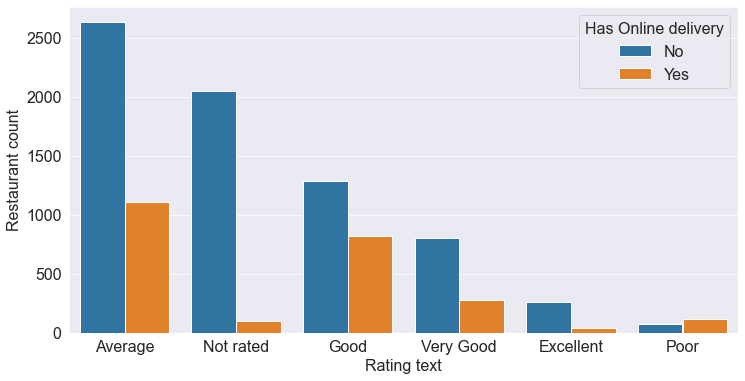

In [451]:
# Does online booking impact the rating?

sns.countplot(x = final_df["Rating text"], hue = final_df["Has Online delivery"], order=final_df["Rating text"].value_counts().index)
plt.ylabel("Restaurant count")
plt.show()

In [452]:
temp = final_df[~(final_df["Aggregate rating"] == 0.0)]

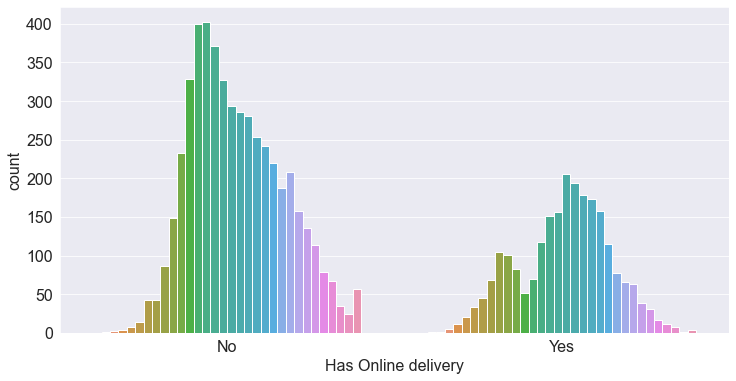

In [453]:
sns.countplot(hue = temp["Aggregate rating"], x = temp["Has Online delivery"])
plt.legend([],[], frameon=False)
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Restaurants with excellent, very good, good and average ratings have more ratings when even if the online delivery facility was not available in the restaurant.
- Having online delivery option has no impact on ratings. 
- Higher number of restaurants with online delivery option were rated poor. Quality may have been compromised for these restaurants

</div>

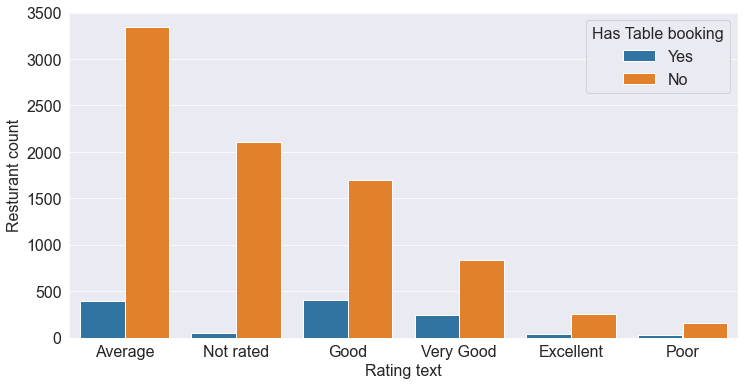

In [454]:
# Does table booking impact the rating?

sns.countplot(x = final_df["Rating text"], hue = final_df["Has Table booking"], order=final_df["Rating text"].value_counts().index)
plt.ylabel("Resturant count")
plt.show()

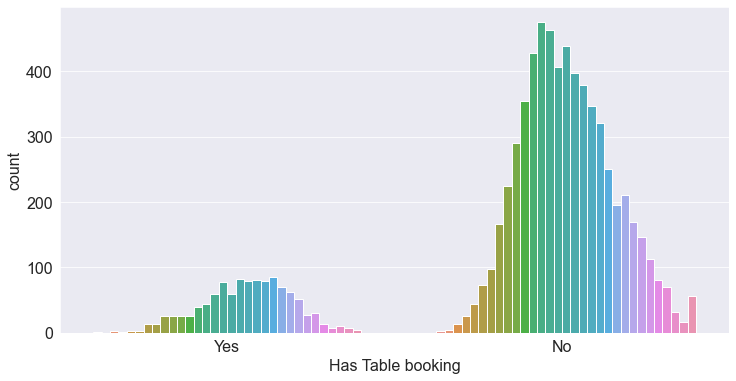

In [455]:
sns.countplot(hue = temp["Aggregate rating"], x = temp["Has Table booking"])
plt.legend([],[], frameon=False)
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- The restaurants which do not have table booking facility tends to have higher ratings as compared to the restaurants which do have table booking facility available with them. 
- Table booking facility does not impact ratings.

</div>

In [456]:
# Price range distribution
100*final_df["Price range"].value_counts(normalize=True)

1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: Price range, dtype: float64

**Assumption**

- Price range of 1 -> low prices
- Price range of 2 -> Average prices
- Price range of 3 -> high prices
- Price range of 4 -> exorbitant prices

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- 46% of the restaurants have low price rates

</div>

In [457]:
temp = final_df.groupby(["Country", "Price range"]).agg({'Average Cost for two(USD)': np.mean, 'Restaurant ID':np.size}).reset_index()
temp.head()

,Country,Price range,Average Cost for two(USD),Restaurant ID
0,Australia,1,4.90,4
1,Australia,2,14.01,14
2,Australia,3,21.01,5
3,Australia,4,84.04,1
4,Brazil,1,6.05,2


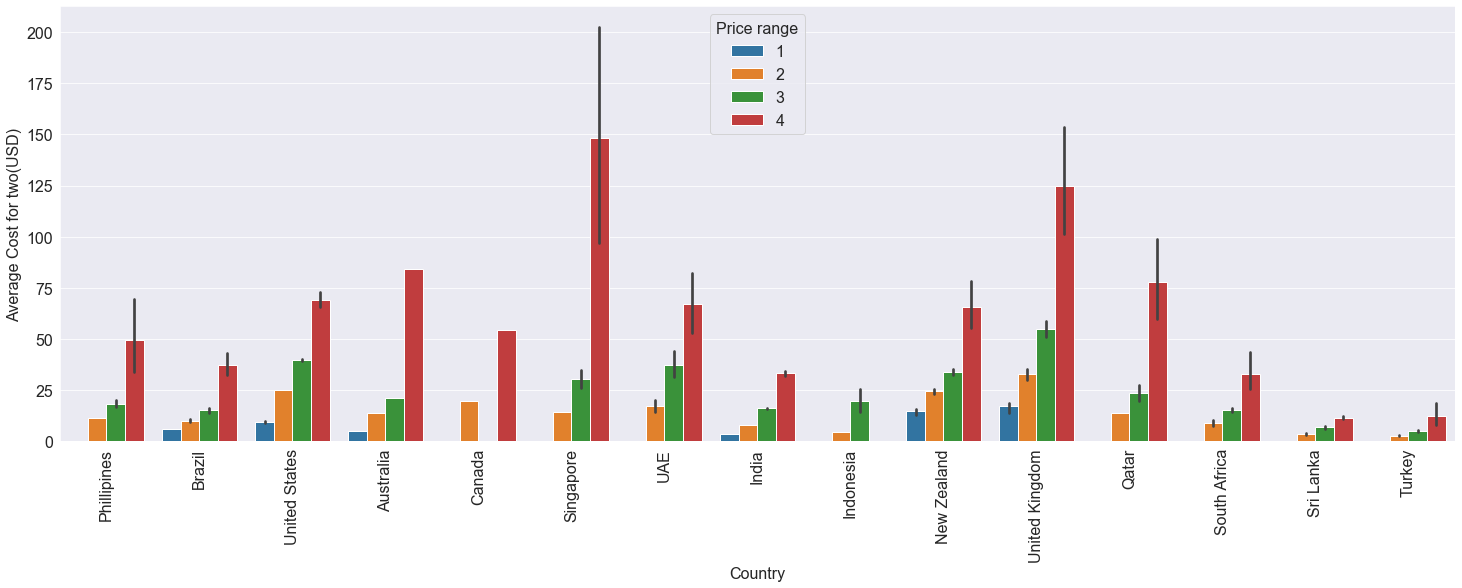

In [458]:
plt.figure(figsize=(25,8))
sns.barplot(data=final_df, x="Country", y="Average Cost for two(USD)", hue="Price range")
plt.xticks(rotation=90)
plt.show()

In [459]:
temp[temp.Country =="India"]

,Country,Price range,Average Cost for two(USD),Restaurant ID
10,India,1,3.662764,4295
11,India,2,7.985966,2858
12,India,3,16.199910,1111
13,India,4,33.263608,388


<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Brazil, United States, Australia, India, New Zealand, United Kingdom have price range 1 restaurants in their countries, they have cheap and affordable restaurants
- Singapore and United Kingdom have higher number of price range 4 restaurants 
- Indian price range 1 restaurants are dominating the dataset
</div>

In [460]:
# Votes distribution
# Number of ratings casted by customers

final_df.groupby("Country")["Votes"].sum().sort_values(ascending = False)

Country
India             1187163
United States      185848
UAE                 29611
South Africa        18910
United Kingdom      16439
Indonesia           16214
Turkey              14670
New Zealand          9721
Phillipines          8963
Qatar                3276
Sri Lanka            2929
Australia            2674
Brazil               1177
Singapore             638
Canada                412
Name: Votes, dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Indian customer base is the highest and hence Indian customers have rated the most

</div>

In [461]:
# restaurants with outlets

final_df["Restaurant Name"].value_counts().head()

Cafe Coffee Day     83
Domino's Pizza      79
Subway              63
Green Chick Chop    51
McDonald's          48
Name: Restaurant Name, dtype: int64

Text(0.5, 1.0, 'Top 10 biggest restaurant chains')

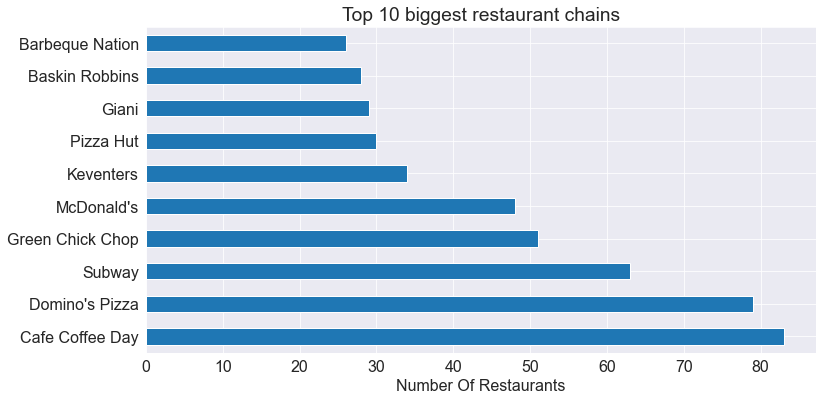

In [462]:
final_df["Restaurant Name"].value_counts().head(10).plot(kind = 'barh')
plt.xlabel("Number Of Restaurants")
plt.title("Top 10 biggest restaurant chains")

In [463]:
final_df.groupby("Restaurant Name").agg({"Aggregate rating":np.mean, "Restaurant Name":np.size}).rename(columns={"Restaurant Name": "Count"}).sort_values("Count", ascending=False).head().reset_index()

,Restaurant Name,Aggregate rating,Count
0,Cafe Coffee Day,2.419277,83
1,Domino's Pizza,2.740506,79
2,Subway,2.907937,63
3,Green Chick Chop,2.672549,51
4,McDonald's,3.339583,48


In [464]:
temp = final_df.groupby("Restaurant Name").agg({"Aggregate rating":np.mean, "Restaurant Name":np.size}).rename(columns={"Restaurant Name": "Count"}).sort_values("Count", ascending=False).head(20).reset_index()

In [465]:
temp = temp.sort_values("Aggregate rating", ascending=False)
temp.head()

,Restaurant Name,Aggregate rating,Count
9,Barbeque Nation,4.353846,26
19,Starbucks,3.805556,18
4,McDonald's,3.339583,48
6,Pizza Hut,3.320000,30
10,Dunkin' Donuts,3.136364,22


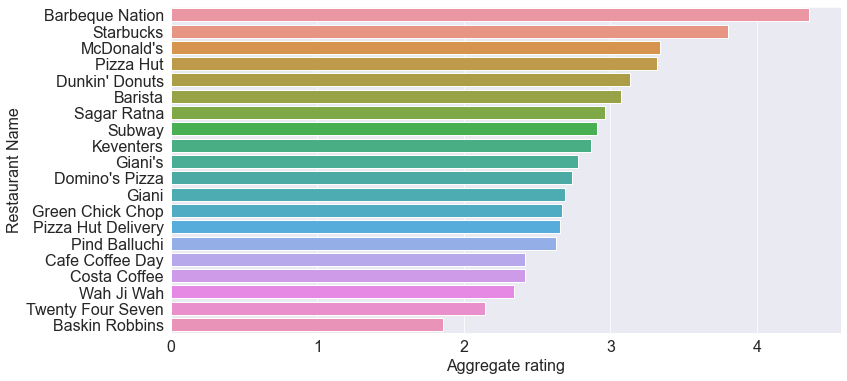

In [466]:
sns.barplot(x = temp["Aggregate rating"], y = temp["Restaurant Name"])
plt.legend([],[], frameon=False)
plt.show()

In [467]:
temp = temp.sort_values("Aggregate rating")
temp.head()

,Restaurant Name,Aggregate rating,Count
8,Baskin Robbins,1.860714,28
18,Twenty Four Seven,2.147368,19
16,Wah Ji Wah,2.342105,19
13,Costa Coffee,2.415000,20
0,Cafe Coffee Day,2.419277,83


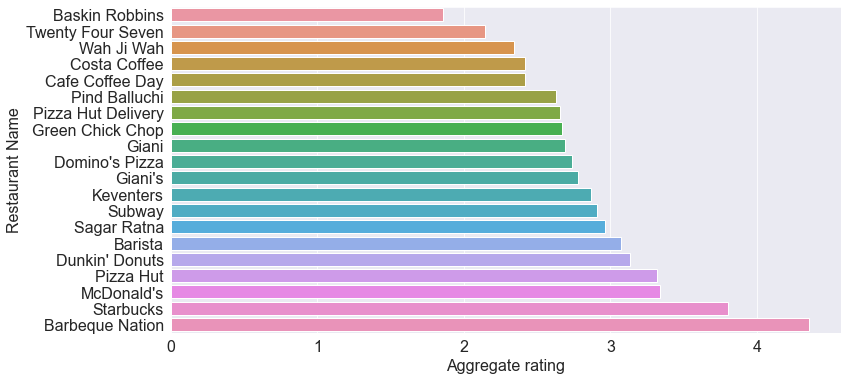

In [468]:
sns.barplot(x = temp["Aggregate rating"], y = temp["Restaurant Name"])
plt.legend([],[], frameon=False)
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Cafe Coffee Day has over 80 cafes across the world that are listed in Zomato. 
- Barbeque Nation is the best rated restaurant chain
- Restaurant chains Baskin Robins and Twenty Four Seven are rated poorly amongst all the restaurant chains

</div>

In [469]:
# restaurants with outlets
# outlet count per city

final_df.groupby('City')['Restaurant Name'].value_counts().sort_values(ascending= False)[:10]

City       Restaurant Name 
New Delhi  Cafe Coffee Day     57
           Domino's Pizza      55
           Subway              38
           Green Chick Chop    37
           McDonald's          33
           Giani               24
           Keventers           24
           Giani's             17
           Aggarwal Sweets     14
           Wah Ji Wah          14
Name: Restaurant Name, dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

-  Cafe Coffee Day, Domino's Pizza, Subway, Green Chick Chop and McDonald's have more than 30 outlets in New Delhi

</div>

### Understanding the Rating aggregate, color and text columns

In [470]:
final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [471]:
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns= {0:"Rating count"})

In [472]:
ratings

,Aggregate rating,Rating color,Rating text,Rating count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Rating between 4.5 and 5, the food was rated "Excellent"
- Rating between 4.0 and 4.4, the food was rated "Very Good"
- Rating between 3.5 and 3.9, the food was rated "Good"
- Rating between 2.5 and 3.4, the food was rated "Average"
- Rating between 1.8 and 2.4, the food was rated "Poor"
- 2148 restaurants were not rated at all
- No restaurants were rated 5

</div>

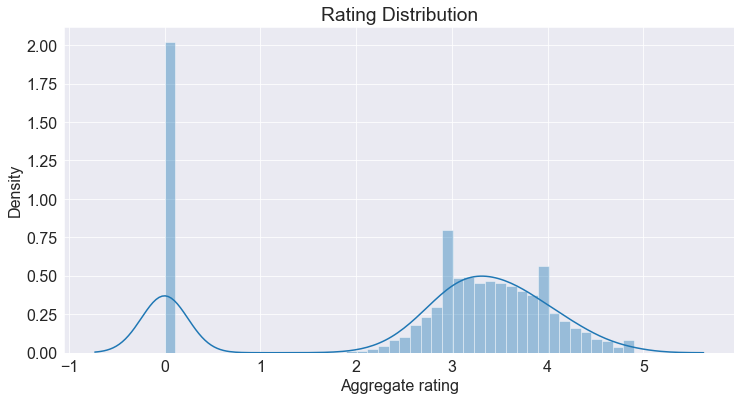

In [473]:
sns.distplot(final_df['Aggregate rating'])
plt.title('Rating Distribution')
plt.show()

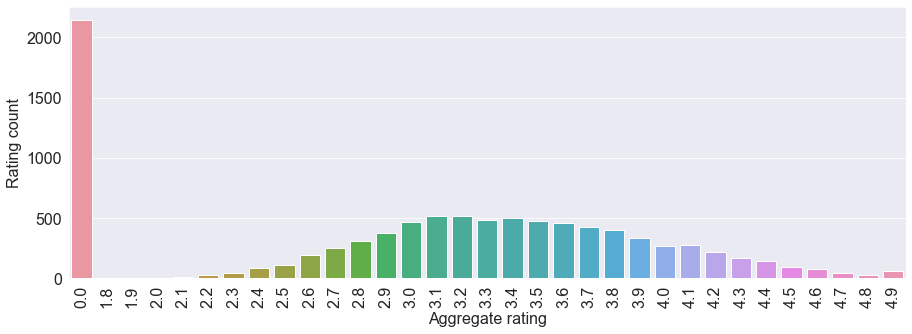

In [474]:
plt.figure(figsize=(15,5))
# sns.barplot(data=ratings, x="Aggregate rating", y="Rating count", hue="Rating color", palette=["White","red","orange","yellow","green","green"])
sns.barplot(data=ratings, x="Aggregate rating", y="Rating count" )
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Maximum ratings lie between 2.9 and 3.9
- It nearly follows a normal distribution 

</div>

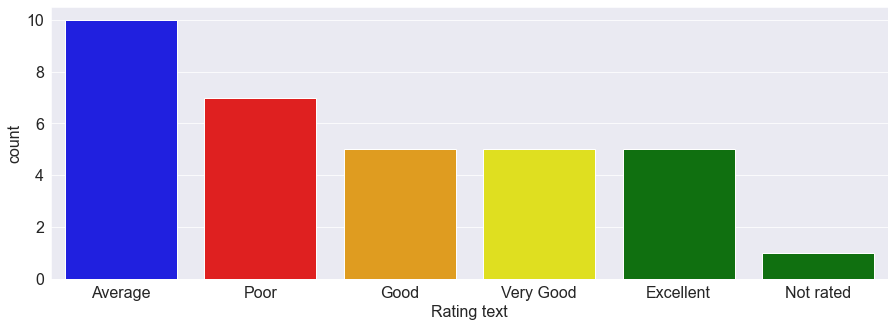

In [475]:
plt.figure(figsize=(15,5))
sns.countplot(data=ratings, x="Rating text", palette=["blue","red","orange","yellow","green","green"], order=ratings["Rating text"].value_counts().index)
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Number of restaurants that are rated "Average" is highest followed by "Poor" rating
- Restaurants that were rated "Good", "Very Good" and "Excellent" almost have the same counts.

</div>

In [476]:
# countries with 0 restaurant ratings

final_df[final_df["Aggregate rating"]==0]["Country"].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

In [477]:
final_df[final_df["Aggregate rating"]==0].groupby("Country").size().reset_index()

,Country,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


<div class="alert alert-block alert-success">
<b>Observation:</b> 

- India has the most number of unrated restaurants.
- Most of the restaurants may have been unrated as cutsomers prefer dining-in instead of ordering online.
- Except India, Brazil, United States and United Kingdom, all other countries' restaurants were rated
</div>

In [478]:
# Top 5 countries that have high number of good ratings

final_df[final_df['Rating text'] == 'Excellent'].groupby('Country').size().reset_index().rename(columns={0: 'Counts'}).sort_values('Counts', ascending=False).head()

,Country,Counts
2,India,116
12,United States,68
11,United Kingdom,23
10,UAE,18
1,Brazil,16


In [479]:
final_df[final_df['Rating text'] == 'Very Good'].groupby('Country').size().reset_index().rename(columns={0: 'Counts'}).sort_values('Counts', ascending=False).head()

,Country,Counts
3,India,692
14,United States,179
9,South Africa,35
12,UAE,31
13,United Kingdom,31


In [480]:
final_df[final_df['Rating text'] == 'Good'].groupby('Country').size().reset_index().rename(columns={0: 'Counts'}).sort_values('Counts', ascending=False).head()

,Country,Counts
3,India,1847
14,United States,159
13,United Kingdom,20
0,Australia,13
9,South Africa,12


<div class="alert alert-block alert-success">
<b>Observation:</b> 

- 116 restaurants in India were rated as Excellent. India also has the highest counts in restaurants that were rated Very good and Good.
- Other than India, United States and United Kingdom all other countries have less than 20 restaurants rated as Excellent
- India, Unites States, United Kingdom, UAE and South Africe have many restaurants with good ratings

</div>

In [481]:
final_df[final_df['Rating text'] == 'Poor'].groupby('Country').size().reset_index().rename(columns={0: 'Counts'})

,Country,Counts
0,Australia,1
1,India,180
2,New Zealand,1
3,Sri Lanka,1
4,UAE,1
5,United States,2


<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Totally 186 restaurants were rated poor. Out of which 180 restaurants are from India
- United Kingdom has third most number of restaurants, but none of them were rated poor

</div>

<AxesSubplot:xlabel='Rating text', ylabel='Average Cost for two(USD)'>

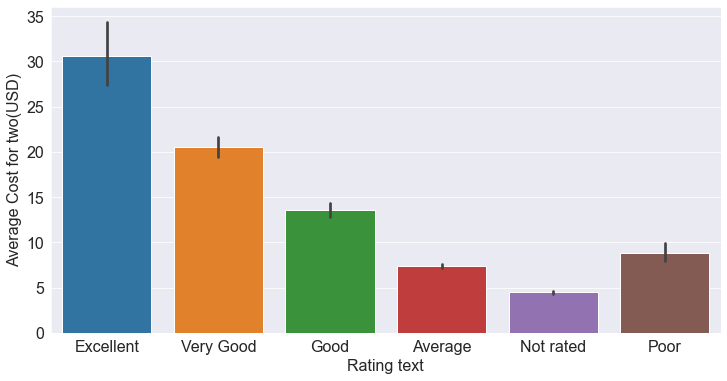

In [482]:
# cost for two v/s restaurant rating

sns.barplot(data=final_df, x="Rating text", y="Average Cost for two(USD)")

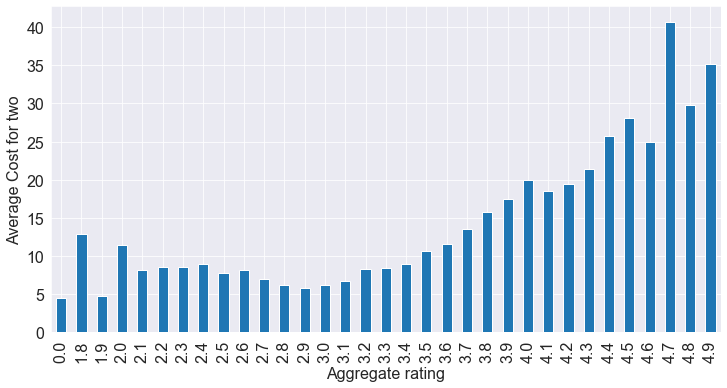

In [483]:
final_df.groupby('Aggregate rating')['Average Cost for two(USD)'].mean().plot(kind='bar')
plt.ylabel('Average Cost for two')
plt.show()

<AxesSubplot:xlabel='Average Cost for two(USD)', ylabel='Aggregate rating'>

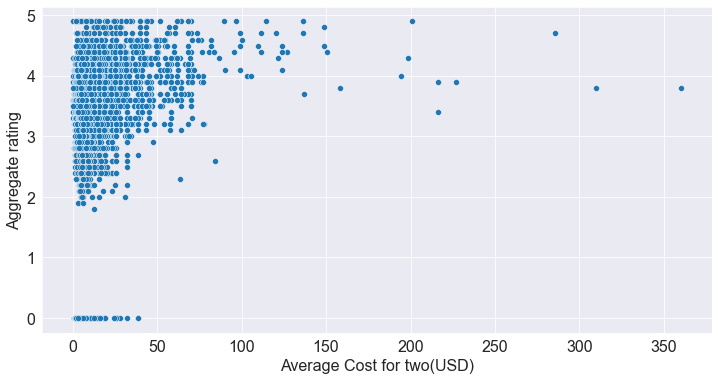

In [484]:
sns.scatterplot(data=final_df, y="Aggregate rating", x="Average Cost for two(USD)")

<AxesSubplot:xlabel='Rating text', ylabel='Average Cost for two(USD)'>

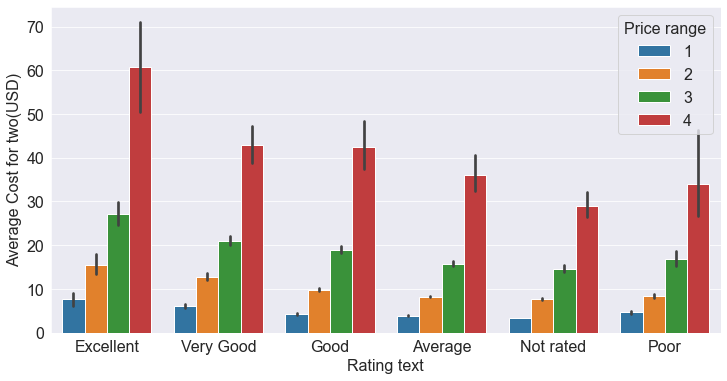

In [485]:
sns.barplot(data=final_df, x="Rating text", y="Average Cost for two(USD)", hue="Price range")

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Average cost for two is high when restaurants have 4.7 and 4.9 ratings
- The restaurants rated very good and excellent have higher "average cost for two" in few instances and have higher number of price range 4 restaurants
- As the rating increases, there is a slight shift in average cost for two
- There is a positive relationship between average cost for two and rating
</div>

<AxesSubplot:xlabel='Aggregate rating'>

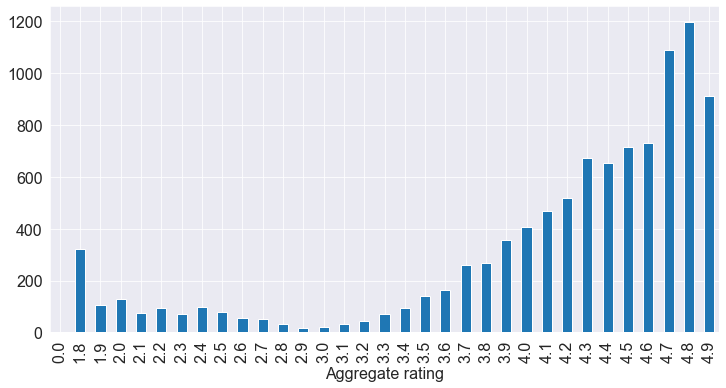

In [486]:
final_df.groupby("Aggregate rating")["Votes"].mean().plot(kind="bar")

<AxesSubplot:xlabel='Rating text'>

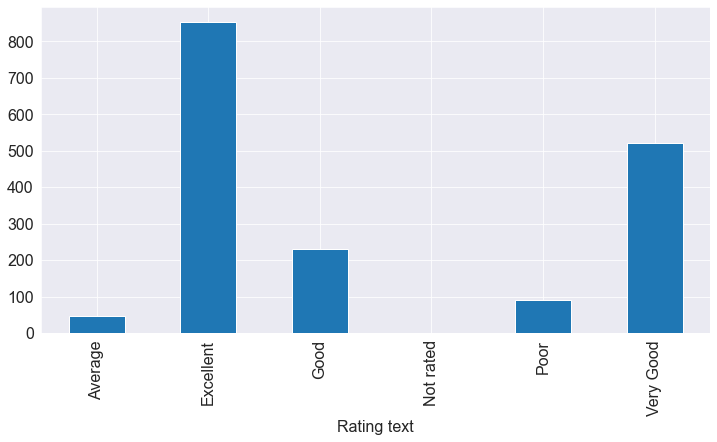

In [487]:
final_df.groupby("Rating text")["Votes"].mean().plot(kind="bar")

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Restaurants which are rated good, very good and excellent have higher number of votes.
- Restaurants which are rated average and poor have lower number of votes

</div>

<AxesSubplot:xlabel='Price range', ylabel='count'>

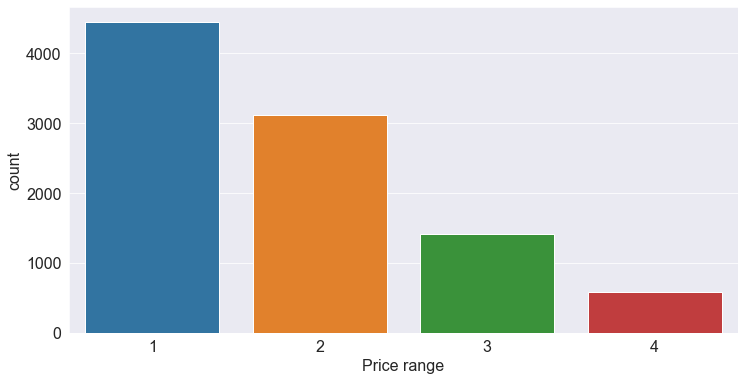

In [488]:
sns.countplot(final_df["Price range"])

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Very few resturants have price range of 4 and there are many cheaper resturants available.

</div>

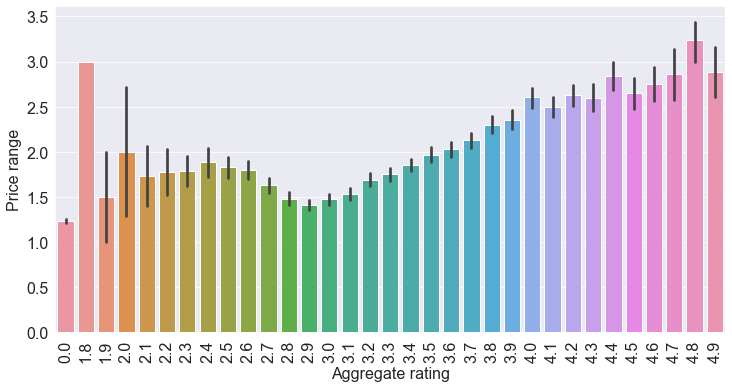

In [489]:
# price range and restaurant rating

sns.barplot(data=final_df, x="Aggregate rating", y="Price range")
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- There is a linear trend in rating versus price range after 2.9 rating. As price increases, the ratings increase.

</div>

### Analysis of Ratings, Votes and Average cost for two across price range 

In [490]:
# combining two columns to a single column

final_df.loc[((final_df['Has Table booking'] == 'Yes')& (final_df['Has Online delivery'] == 'Yes')), "Delivery_Reservation"] = "Both_Available"

final_df.loc[((final_df['Has Table booking'] == 'Yes')& (final_df['Has Online delivery'] == 'No')), "Delivery_Reservation"] = "Reservation_No_Delivery"

final_df.loc[((final_df['Has Table booking'] == 'No')& (final_df['Has Online delivery'] == 'Yes')), "Delivery_Reservation"] = "No_Reservation_Only_Delivery"

final_df.loc[((final_df['Has Table booking'] == 'No')& (final_df['Has Online delivery'] == 'No')), "Delivery_Reservation"] = "No_Reservation_No_Delivery"


In [491]:
final_df[((final_df['Has Table booking'] == 'Yes')& (final_df['Has Online delivery'] == 'Yes'))].shape

(435, 25)

In [492]:
final_df[((final_df['Has Table booking'] == 'Yes')& (final_df['Has Online delivery'] == 'No'))].shape

(723, 25)

In [493]:
final_df[((final_df['Has Table booking'] == 'No')& (final_df['Has Online delivery'] == 'Yes'))].shape

(2016, 25)

In [494]:
final_df[((final_df['Has Table booking'] == 'No')& (final_df['Has Online delivery'] == 'No'))].shape

(6377, 25)

In [495]:
final_df.shape

(9551, 25)

In [496]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country',
       'Currency Code', 'Conversion Rate', 'Average Cost for two(USD)',
       'Delivery_Reservation'],
      dtype='object')

In [497]:
temp = final_df.groupby(['Delivery_Reservation', 'Price range']).agg({'Aggregate rating': np.mean, 'Average Cost for two(USD)':np.mean, 'Votes':np.mean }).reset_index()
temp.head()

,Delivery_Reservation,Price range,Aggregate rating,Average Cost for two(USD),Votes
0,Both_Available,1,3.700000,5.800000,61.000000
1,Both_Available,2,3.426829,10.652520,317.699187
2,Both_Available,3,3.630258,17.876716,494.232472
3,Both_Available,4,3.880000,29.509250,831.175000
4,No_Reservation_No_Delivery,1,1.809778,3.771499,37.693294


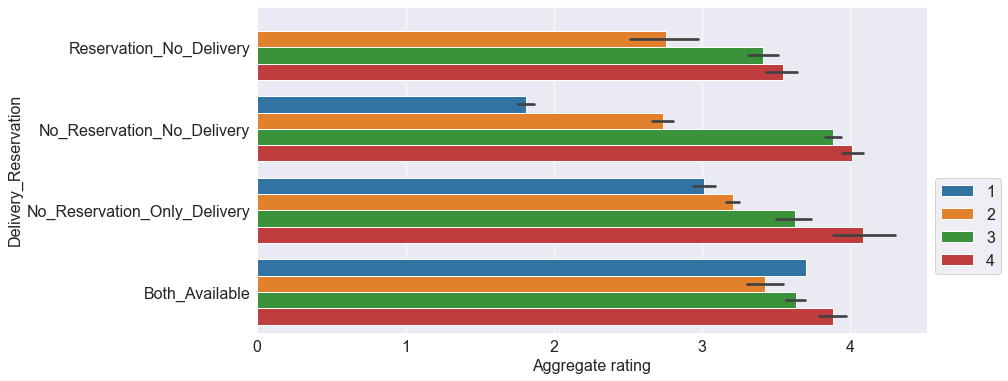

In [498]:
#plt.figure(figsize=(25,8))
sns.barplot(data=final_df, y="Delivery_Reservation", x="Aggregate rating", hue="Price range")
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- As the price range increases from 1 to 4, the ratings gradually increases irrespective of table booking and online delivery facilities. When both facilities are available in the restaurant, the overall trend observed does not follow
- Price range 4 and only delivery restaurants have the highest ratings. Customers who order online rate the restaurants more diligently on the app
- Restaurants have higher ratings across all price ranges if both services are available

</div>

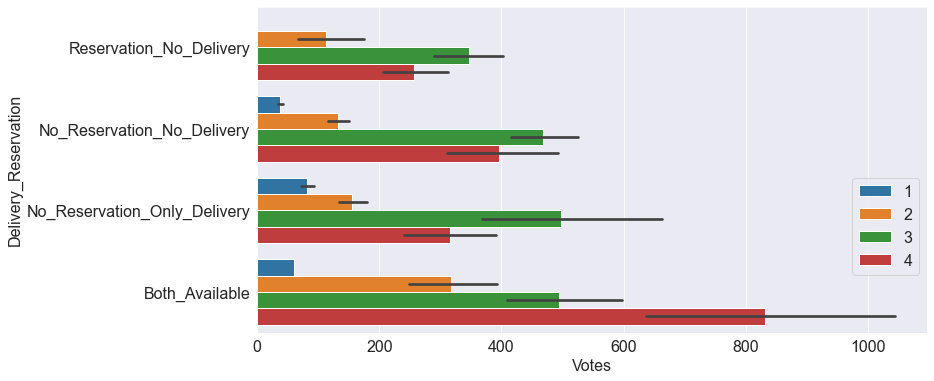

In [499]:
#plt.figure(figsize=(25,8))
sns.barplot(data=final_df, y="Delivery_Reservation", x="Votes", hue="Price range")
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- When both facilities are available in the restaurant, it does not follow the overall trend observed. Votes received for price range 3 restaurants is higher except when both facilities are available.

</div>

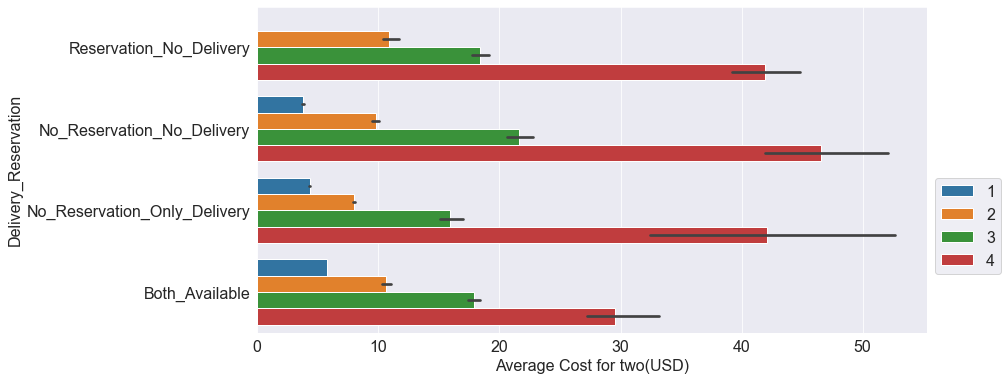

In [500]:
#plt.figure(figsize=(25,8))
sns.barplot(data=final_df, y="Delivery_Reservation", x="Average Cost for two(USD)", hue="Price range")
plt.legend(bbox_to_anchor=(1,0.5))
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Dine-in and price range 4 restaurants are most expensive. Customers are more likely to order fancy cuisines from the menu at the restaurant.
</div>

In [501]:
final_df["Cuisine Count"] = final_df["Cuisines"].apply(lambda x:len(x.split()))

In [502]:
final_df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Aggregate rating,Rating color,Rating text,Votes,Country,Currency Code,Conversion Rate,Average Cost for two(USD),Delivery_Reservation,Cuisine Count
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,4.8,Dark Green,Excellent,314,Phillipines,PHP,0.019102,21.01,Reservation_No_Delivery,3
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,4.5,Dark Green,Excellent,591,Phillipines,PHP,0.019102,22.92,Reservation_No_Delivery,1
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,4.4,Green,Very Good,270,Phillipines,PHP,0.019102,76.41,Reservation_No_Delivery,4


In [503]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Price range',
       'Aggregate rating', 'Rating color', 'Rating text', 'Votes', 'Country',
       'Currency Code', 'Conversion Rate', 'Average Cost for two(USD)',
       'Delivery_Reservation', 'Cuisine Count'],
      dtype='object')

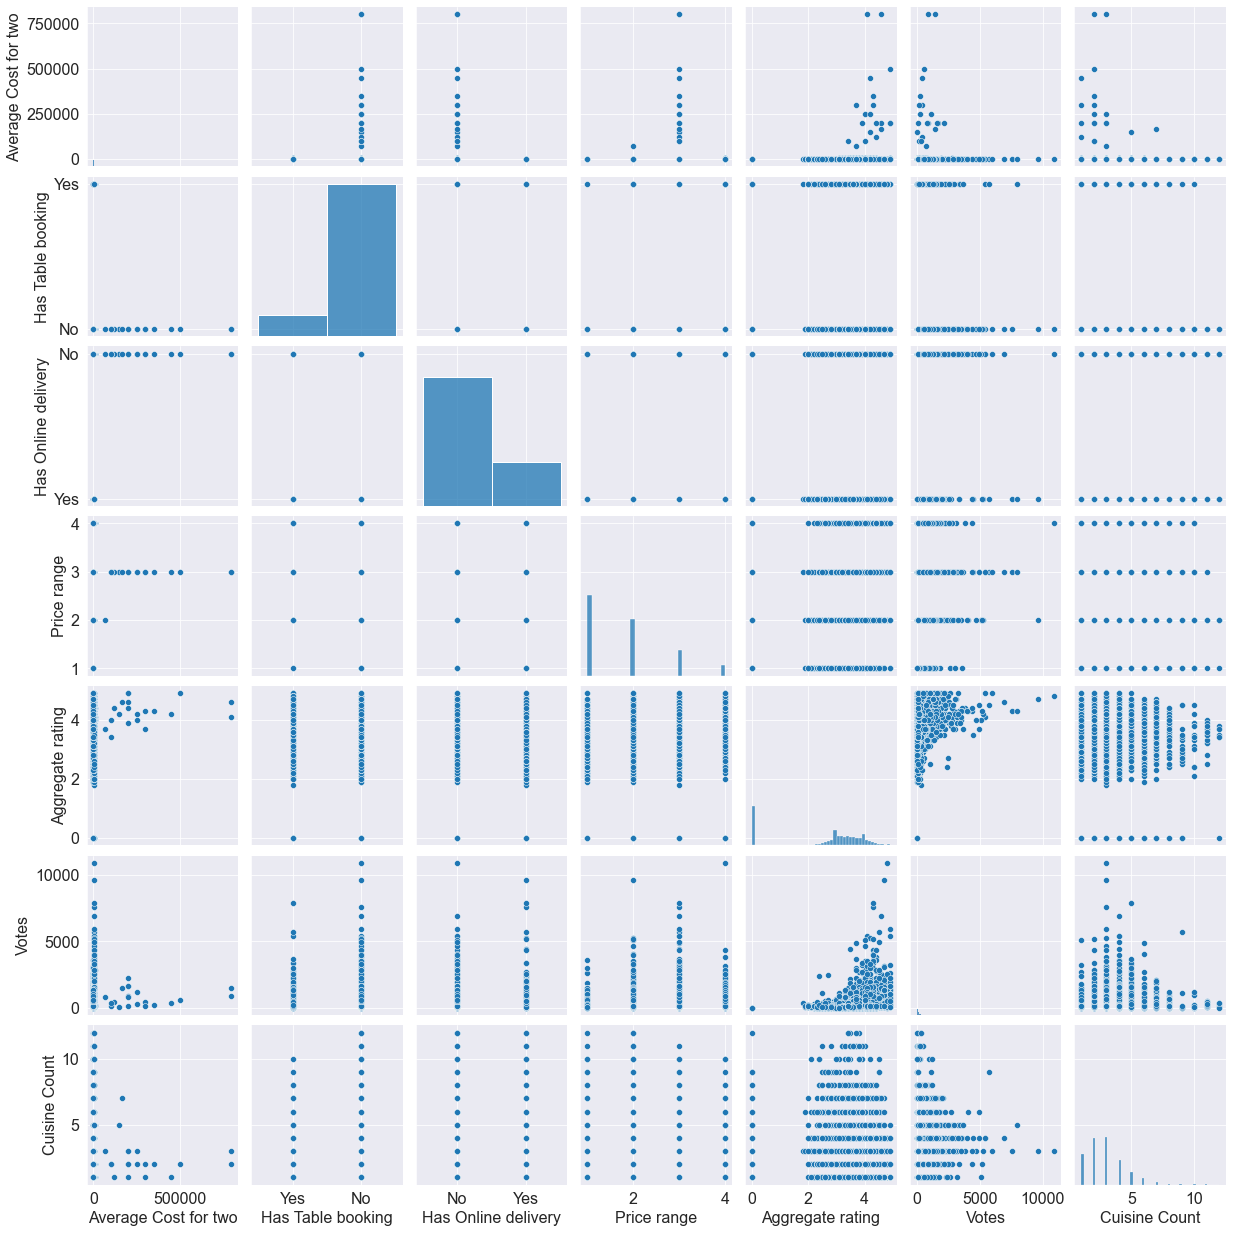

In [504]:
sns.pairplot(data=final_df, vars=['Average Cost for two','Has Table booking','Has Online delivery','Price range', 'Aggregate rating', 'Votes', 'Cuisine Count'])

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Average Cost for two and Cuisine Count have inverse relationship.
- Votes received for expensive restaurants are fewer in numbers. Very few customers frequent expensive restaurants and prefer the ones that are cheaper.
- Higher the cost, higher the ratings
- Price range 3 has more variety of average cost for two.
- Price range of 1 and 2 have more cusines count
- Price range of 3 have higher number of  votes than the other price range.
- Higher the rating, higher the votes received
- Lower the cuisine count, higher the votes received

</div>

<AxesSubplot:>

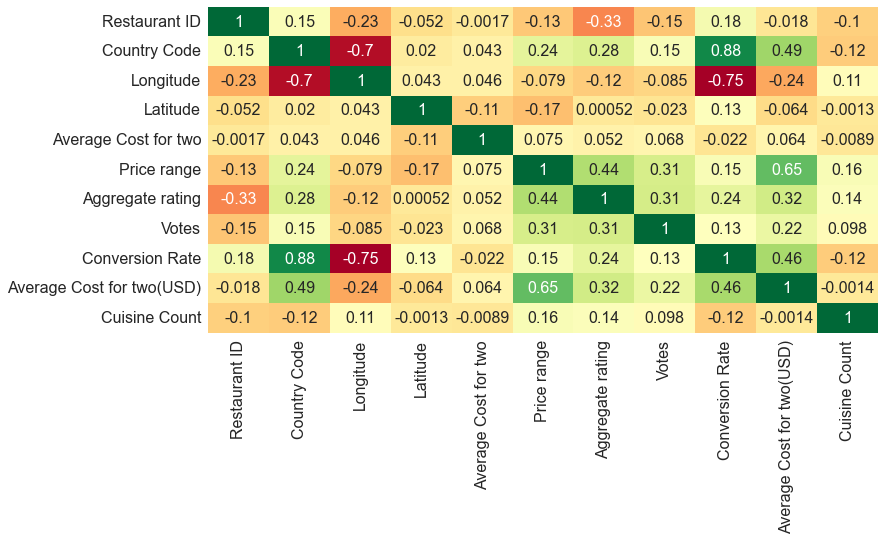

In [505]:
sns.heatmap(final_df.corr(), annot=True,cbar=False, cmap='RdYlGn')

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Price range, Aggregated rating, votes and Average cost for two in USD are postively correlated with each other
</div>

### Cuisine exploration

In [506]:
# Cuisines are comma seperated, splitting them

final_df["Cuisine"] = df["Cuisines"].str.split(", ")
final_df = final_df.explode("Cuisine")
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Rating color,Rating text,Votes,Country,Currency Code,Conversion Rate,Average Cost for two(USD),Delivery_Reservation,Cuisine Count,Cuisine
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Dark Green,Excellent,314,Phillipines,PHP,0.019102,21.01,Reservation_No_Delivery,3,French
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Dark Green,Excellent,314,Phillipines,PHP,0.019102,21.01,Reservation_No_Delivery,3,Japanese
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Dark Green,Excellent,314,Phillipines,PHP,0.019102,21.01,Reservation_No_Delivery,3,Desserts
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Dark Green,Excellent,591,Phillipines,PHP,0.019102,22.92,Reservation_No_Delivery,1,Japanese
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Green,Very Good,270,Phillipines,PHP,0.019102,76.41,Reservation_No_Delivery,4,Seafood


In [507]:
# top 5 Cuisines
final_df["Cuisine"].value_counts().head()

North Indian    3960
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Name: Cuisine, dtype: int64

In [508]:
# Least popular cuisines

final_df["Cuisine"].value_counts().tail()

Fish and Chips    1
Malwani           1
Cuisine Varies    1
Soul Food         1
Bí_rek            1
Name: Cuisine, dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 
  
- The potential for growth in South Indian cuisines in India seems to be good due to the lack of competition and variety of vegetarian dishes.
</div>

In [509]:
# top 5 cuisines with Excellent rating

final_df[final_df['Rating text'] =="Excellent"]["Cuisine"].value_counts().head()

North Indian    47
American        44
Italian         38
Cafe            38
Desserts        31
Name: Cuisine, dtype: int64

In [510]:
# top 5 cuisines with Excellent and Very Good rating

final_df[final_df['Rating text'].isin(["Excellent", "Very Good"])]["Cuisine"].value_counts().head()

North Indian    323
Italian         264
Continental     223
Chinese         222
Cafe            201
Name: Cuisine, dtype: int64

In [511]:
# top 5 cuisines with Poor rating

final_df[final_df['Rating text'] =="Poor"]["Cuisine"].value_counts().head()

North Indian    96
Chinese         78
Fast Food       63
Mughlai         28
Pizza           27
Name: Cuisine, dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

    
- Restaurants which provide North Indian, Chinese and Fast Food were rated Poor.
- Restaurants which provide North Indian, American and Italian were rated Excellent.
- North Indian cuisine features on all three lists at the top. North Indian cuisine dominates the Indian taste buds, but this could be because the majority of restaurants are based in North Indian cities

</div>

In [512]:
# top 5 rated cuisines

final_df.groupby("Cuisine")["Aggregate rating"].median().sort_values(ascending=False).head()

Cuisine
Sunda        4.90
Dim Sum      4.70
Bí_rek       4.70
Taiwanese    4.65
Ramen        4.50
Name: Aggregate rating, dtype: float64

In [513]:
final_df.groupby("Cuisine")["Aggregate rating"].median().sort_values().head()

Cuisine
Nepalese          0.0
Armenian          0.0
Cuisine Varies    0.0
Awadhi            0.0
Mineira           0.0
Name: Aggregate rating, dtype: float64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

    
- Restaurants with Sunda and Dim Sum cuisines have received a high rating of 4.9

</div>

In [514]:
# Restaurant count of each cuisines per country

final_df.groupby(["Country","Cuisine"]).size().reset_index().rename(columns={0:"Count"}).sort_values(by='Count', ascending=False).head()

,Country,Cuisine,Count
121,India,North Indian,3946
79,India,Chinese,2690
86,India,Fast Food,1963
117,India,Mughlai,992
66,India,Bakery,726


<div class="alert alert-block alert-success">
<b>Observation:</b> 

    
- There is a huge number of North Indian, Chinese and Fast food restaurants for customers to choose from 

</div>

In [515]:
# count number of resturants per cuisine per country

temp = final_df.groupby(["Country","Cuisine"])["Restaurant ID"].size().reset_index().sort_values(by='Restaurant ID', ascending=False)

In [516]:
temp.head()

,Country,Cuisine,Restaurant ID
121,India,North Indian,3946
79,India,Chinese,2690
86,India,Fast Food,1963
117,India,Mughlai,992
66,India,Bakery,726


In [517]:
# Popular cuisines in US

temp[temp["Country"]=="United States"].head()

,Country,Cuisine,Restaurant ID
410,United States,American,112
453,United States,Seafood,59
420,United States,Burger,49
449,United States,Pizza,49
452,United States,Sandwich,49


In [518]:
# Popular cuisines in India

temp[temp["Country"]=="India"].head()

,Country,Cuisine,Restaurant ID
121,India,North Indian,3946
79,India,Chinese,2690
86,India,Fast Food,1963
117,India,Mughlai,992
66,India,Bakery,726


In [519]:
# Popular cuisines in UK

temp[temp["Country"]=="United Kingdom"].head()

,Country,Cuisine,Restaurant ID
390,United Kingdom,Indian,17
377,United Kingdom,Cafe,12
375,United Kingdom,British,12
371,United Kingdom,American,11
391,United Kingdom,Italian,9


In [520]:
final_df["Cuisine Count"].value_counts()

3     5680
4     3907
2     3440
5     2330
1     1679
6     1477
7      590
8      218
11     127
9      115
10      92
12      64
Name: Cuisine Count, dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Most restaurants seem to offer 2-4 types of cusinies.

</div>

In [521]:
# Maximum number of cuisines served in a restaurant per country

final_df.groupby(["Country"])["Cuisine Count"].max().reset_index().sort_values(by ="Cuisine Count", ascending=False)

,Country,Cuisine Count
3,India,12
9,South Africa,10
5,New Zealand,9
4,Indonesia,7
0,Australia,6
12,UAE,6
14,United States,6
1,Brazil,5
7,Qatar,5
8,Singapore,5


In [522]:
final_df[final_df["Cuisine Count"] >10].groupby("Country").size()

Country
India    191
dtype: int64

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Few restaurants in India & South Africa offer >9 cuisines
- Significant number of restaurants in India offer more than 10 cuisines

</div>

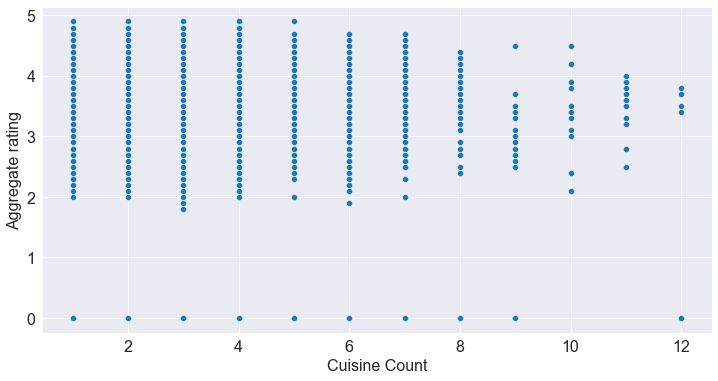

In [523]:
sns.scatterplot(data=final_df, x="Cuisine Count", y="Aggregate rating")
plt.show()

<div class="alert alert-block alert-success">
<b>Observation:</b> 

- Higher number of cuisines available in the restaurant, higher is the restaurant rating.
- The rating is lower when restaurants have 8,9,12 cuisines

</div>

### Summary and Recommendations

- Zomato provides its service in 15 countries. 90% of the restaurants are located in India and its service is available in 43 cities. Zomato is a Indian based company, hence more popular in India.
- Second highest number of the restaurants listed in Zomato is from the United States and its the service is available in 35 cities.
- Third highest number of the restaurants listed in Zomato is from the United Kingdom although their service is availble only in 4 cities. They must increase the number of restaurants in the cities that they already provide service.
- Zomato services 46 cities around the world. There are some countries where the service is available in only one or two cities, they must increase their presence in such countries and expand to different cities.
- A majority of Indian restaurants have 0 ratings. They may have been unrated as customers prefer dining-in instead of ordering online, Zomato should nudge customers who opt for dine-in or online delivery orders to rate on their app. They may be newly onboarded restaurants too, Zomato must provide discounts to encourage customers in placing orders with newer restaurants in the area.
- Popular Indian cuisine is North Indian owing to the prolific restaurants in North Indian cities. The potential for growth in South Indian cuisines in India seems to be good due to the lack of competition and variety of vegetarian dishes.
- Turkey, India and Sri Lanka have the cheapest food price for two people amongst the countries. In India, New Delhi has the most exorbitant restaurants.
- Online delivery and table booking facilities are not available in all the countries. Higher number of restaurants with online delivery option were rated poor. Quality may have been compromised for these restaurants.
- Restaurants with price range 1 offer affordability and dominate the Indian market. The average cost for two persons at such restaurants is 3.67 dollars and could be a loss-making effort and may pull down profits, readjust price points to reduce losses due to these restaurants . Restaurants with price range 3 and 4 are fewer in number and they must onboard such restaurants on their app.
- Ratings and the average cost for two are positively correlated. Expensive restaurants provide the best service and ambiance to its customers and the higher rating can be inferred from this notion.
- Out of 186 restaurants were rated poor, 180 restaurants are from India. Big restaurant chains have also received lower ratings. They must improve their relationship with customers by providing add-ons or special offers at the checkout.
- Restaurants have higher ratings across all price ranges if online delivery and table booking facilities are available. Provide these services to increase customer retention rate and frequency of orders.
- Encourage price range 1 and 2 restaurant customers to provide ratings after each order.
- Restaurants that offer fewer than 5 cuisines are better rated, menus could be tweaked by removing items that aren’t getting any love in favor of other dishes that more closely resemble the bestsellers. Changes could be based on emerging menu trends – like vegetarian options are growing in popularity.
